### 데이터 설명
학습용 데이터 셋을 활용하여 모델을 학습하고, 테스트용 데이터셋에 대한 생존 여부를 예측합니다. 
- 학습용 데이터 셋 (train.csv) : 891명의 승객 정보와 생존 여부를 포함한 데이터
- 테스트용 데이터 셋 (test.csv) : 418명의 승객 정보를 포함한 데이터, 생존 여부는 누락되어 있습니다. 


| 컬럼명       | 내용                                                       |
| :--------- | :--------------------------------------------------------- |
| PassengerId  | 승객의 고유 식별자                                        |
| Survived     | 생존 여부 (0: 사망, 1: 생존)                               |
| Pclass       | 티켓 등급 (1: 1등석, 2: 2등석, 3: 3등석)                     |
| Name         | 승객의 이름                                                |
| Sex          | 승객의 성별 (male: 남성, female: 여성)                      |
| Age          | 승객의 나이                                                |
| SibSp        | 함께 탑승한 형제자매/배우자 수                              |
| Parch        | 함께 탑승한 부모/자녀 수                                   |
| Ticket       | 티켓 번호                                                  |
| Fare         | 지불한 운임 요금                                           |
| Cabin        | 객실 번호                                                  |
| Embarked     | 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)     |


# 1. 사이킷런 라이브러리를 임포트 하시오

In [1]:
import sklearn as sk

# 2. 판다스 라이브러리를 임포트 하시오.

In [2]:
import pandas as pd

# 3. 로드한 데이터 프레임을 두개로 쪼개시오, 쪼개진 df의 id 컬럼은 동일하게 있어야함

In [8]:
df = pd.read_csv('./dataset/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:

df1 = df[['PassengerId', 'Survived', 'Pclass']]
df2 = df[['PassengerId', 'Name', 'Sex']]

df1, df2

(     PassengerId  Survived  Pclass
 0              1         0       3
 1              2         1       1
 2              3         1       3
 3              4         1       1
 4              5         0       3
 ..           ...       ...     ...
 886          887         0       2
 887          888         1       1
 888          889         0       3
 889          890         1       1
 890          891         0       3
 
 [891 rows x 3 columns],
      PassengerId                                               Name     Sex
 0              1                            Braund, Mr. Owen Harris    male
 1              2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female
 2              3                             Heikkinen, Miss. Laina  female
 3              4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female
 4              5                           Allen, Mr. William Henry    male
 ..           ...                                                ...     ...
 8

# 4. 쪼개진 df를 합치시오.

In [13]:
df_merged = pd.merge(df1, df2, on='PassengerId')

df_merged

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male
...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male
887,888,1,1,"Graham, Miss. Margaret Edith",female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,890,1,1,"Behr, Mr. Karl Howell",male


# 5. Pclass 에 의 분포도를 seaborn countplot 으로 그리시오

<Axes: xlabel='Pclass', ylabel='count'>

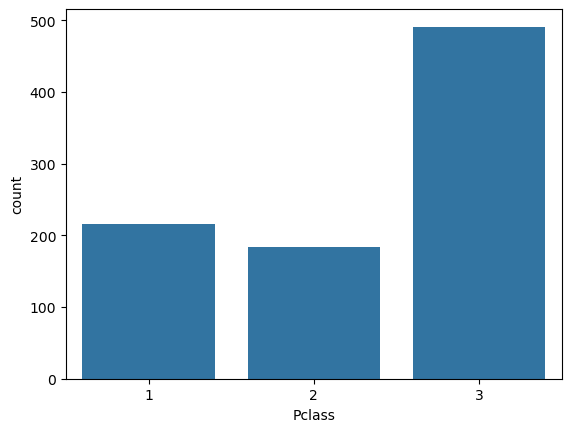

In [19]:
import seaborn as sns

sns.countplot(df, x='Pclass')

# 6. age, pclass의 Joint plot 를 그리시오.

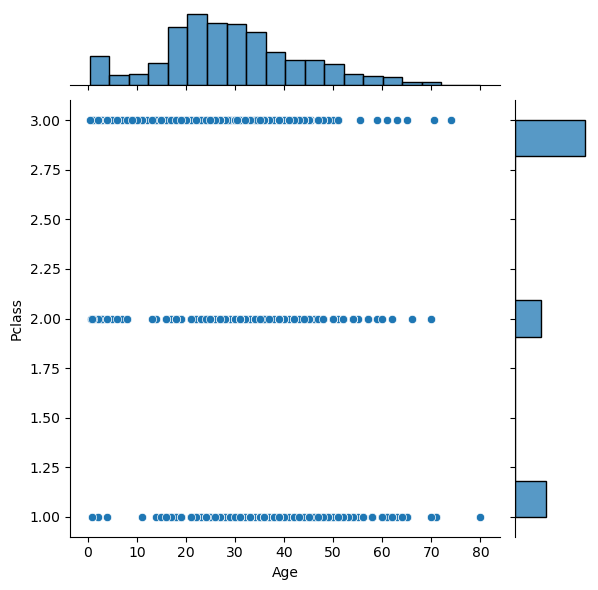

In [21]:
sns.jointplot(df, x='Age', y='Pclass')

# 7. Age boxplot을 그리고 이상치를 확인

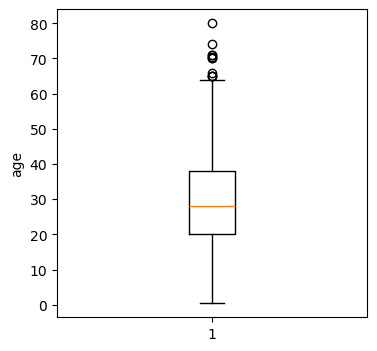

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))
ax.set_ylabel('age')

df_drop = df.dropna(subset='Age')

plt.boxplot(df_drop['Age'])
plt.show()


# 8. 결측치 확인코드 및 삭제, 불필요 컬럼 삭제

In [74]:
print(df.isnull().sum().sum())
df_temp = df.dropna()
df_temp.info()
df_drop = df_temp.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'])
df_drop.info()

866
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null  

# 9. object 타입 원핫 인코딩, pandas get_dummies() 사용 

In [75]:
df_dummy = pd.get_dummies(df_drop, columns=['Sex', 'Embarked'])
df_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,-6.6875,1,0,71.2833,True,False,True,False,False
3,1,1,-6.6875,1,0,53.1000,True,False,False,False,True
6,0,1,-6.6875,0,0,51.8625,False,True,False,False,True
10,1,3,-6.6875,1,1,16.7000,True,False,False,False,True
11,1,1,-6.6875,0,0,26.5500,True,False,False,False,True


# 10. 테스트, 검증셋 분리

In [79]:
from sklearn.model_selection import train_test_split

y = df_dummy['Survived']
X = df_dummy.drop(labels=['Survived'], axis=1)

X_train, x_valid, Y_train , y_valid = train_test_split(X, y, test_size=0.3)

# 11. RobustScalar 수행

In [82]:
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler()

X_train = scalar.fit_transform(X_train)
x_valid = scalar.transform(x_valid)



/opt/anaconda3/envs/aice/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


# 12. 의사결정나무, 랜덤포레스트 모델 학습

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as mt 

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
print(dtc.score(X_train, Y_train))

predicted_decision = dtc.predict(x_valid)



rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
print(rfc.score(X_train, Y_train))

predict_random = rfc.predict(x_valid)

0.984375
0.6
0.984375
0.6727272727272727


# 13. 모델의 성능 평가. accuracy 사용, 둘중에 나은 모델 확인

In [95]:
print(mt.accuracy_score(predicted_decision, y_valid))
print(mt.accuracy_score(y_valid, predict_random))


print(X_train.shape)


0.6
0.6727272727272727
(128, 10)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

# 14. 나이를 예측 하는 딥러닝 모델을 생성 하시오. 
- Tensorflow framework를 사용하여 딥러닝 모델을 만드세요.
- 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
- dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
- 손실함수는 MSE(Mean Squared Error)를 사용하세요.
- 하이퍼파라미터 epochs : 30, batch_size : 16 으로 설정해 주세요.
- 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
- 학습정보는 history 변수에 저장해 주세요. 

In [110]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras. layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint 
from tensorflow. keras.utils import to_categorical

tf.random.set_seed (1)

initializer = tf.keras.initializers.GlorotUniform(seed=42)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,), kernel_initializer=initializer))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='mse', optimizer='adam')

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
check_point = ModelCheckpoint('best_model.keras', verbose=1, monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(X_train, Y_train, validation_data=(x_valid, y_valid)
                    # , callbacks=[es, check_point]
                    , epochs=30, batch_size=16)

/opt/anaconda3/envs/aice/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,529 (9.88 KB)

 Trainable params: 2,529 (9.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2490 - val_loss: 0.3081
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2336 - val_loss: 0.3110
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2186 - val_loss: 0.3135
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2143 - val_loss: 0.3150
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2198 - val_loss: 0.3161
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2084 - val_loss: 0.3173
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2011 - val_loss: 0.3186
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1961 - val_loss: 0.3195
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2026 - val_loss: 0.3205
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1902 - val_loss: 0.3212
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1819 - val_loss: 0.3215
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1807 - val_loss: 0.3215
Epoch 13/30
8

# 15. matplotlib 를 이용해서 학습 mse, 검증 mse를 그래프로 그리시오.
- 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
- 위 2가지 각각의 범례를 'mse', 'val_mse'로 표시하세요.
- 그래프의 타이들은 'Model MSE'로 표시하세요.
- X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.

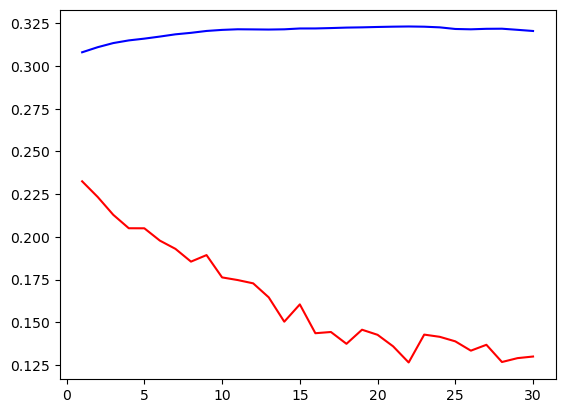

In [111]:
import matplotlib.pyplot as plt


mse = history.history['loss']
val_mse = history.history['val_loss']
epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, 'r')
plt.plot(epochs, val_mse, 'b')
plt.show()